In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
base_path = os.getcwd()
players_file = os.path.join(base_path, "Datos", "players_22.csv")

players = pd.read_csv(players_file, encoding="utf-8", low_memory=False)

features = ["overall", "potential", "wage_eur", "value_eur", "age"]
players = players.dropna(subset=features)

data = players[features].copy()

print(data.head())

   overall  potential  wage_eur    value_eur  age
0       93         93  320000.0   78000000.0   34
1       92         92  270000.0  119500000.0   32
2       91         91  270000.0   45000000.0   36
3       91         91  270000.0  129000000.0   29
4       91         91  350000.0  125500000.0   30


In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

mean_values = data.mean()
min_values = data.min()
max_values = data.max()

print("Medias de los parametros:\n")
print(f"Overall promedio: {mean_values['overall']:.2f}")
print(f"Overall min: {min_values['overall']:.2f}")
print(f"Overall max: {max_values['overall']:.2f}")
print(f"Potential promedio: {mean_values['potential']:.2f}")
print(f"Potential min: {min_values['potential']:.2f}")
print(f"Sueldo promedio (EUR): {mean_values['wage_eur']:.2f}")
print(f"Valor promedio (EUR): {mean_values['value_eur']:.2f}")
print(f"Edad promedio: {mean_values['age']:.2f}")

Medias de los parametros:

Overall promedio: 65.76
Overall min: 47.00
Overall max: 93.00
Potential promedio: 71.08
Potential min: 49.00
Sueldo promedio (EUR): 9021.72
Valor promedio (EUR): 2850451.81
Edad promedio: 25.19


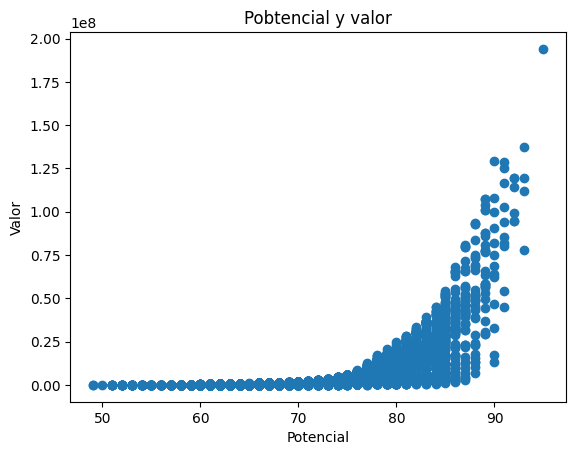

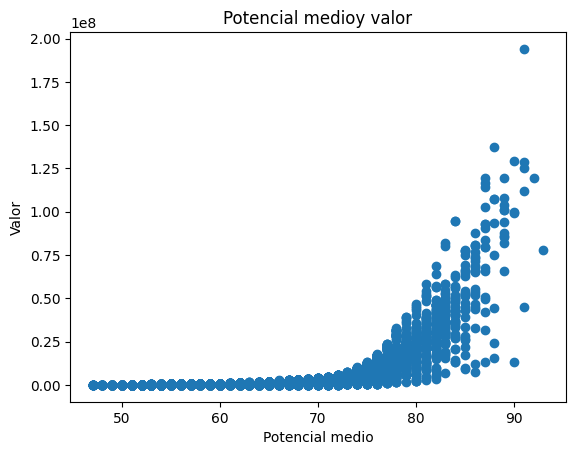

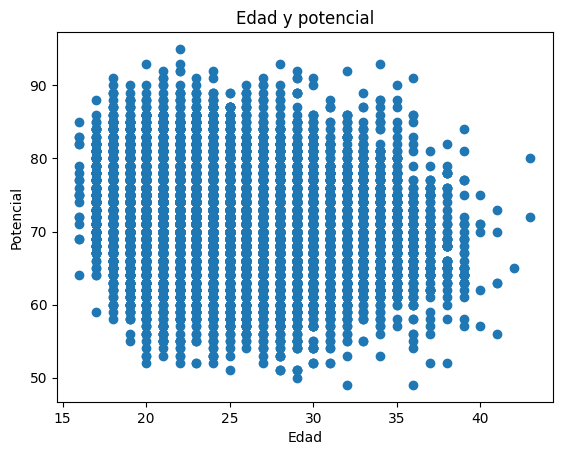

In [4]:
# Grafico de potencial y valor en euros
plt.scatter(data["potential"], data["value_eur"])
plt.ylabel("Valor")
plt.title("Pobtencial y valor")
plt.xlabel("Potencial")
plt.show()

#Grafico de overall y potencial
plt.scatter(data["overall"], data["value_eur"])
plt.ylabel("Valor")
plt.title("Potencial medioy valor")
plt.xlabel("Potencial medio")
plt.show()

#Grafico edad y potencial maximo
plt.scatter(data["age"], data["potential"])
plt.ylabel("Potencial")
plt.title("Edad y potencial")
plt.xlabel("Edad")
plt.show()

In [5]:
data_mean = data.mean()
data_min = data.min()
data_max = data.max()

print(f"Overall promedio: {data_mean["overall"]:.2f}")
print(f"Overall minimo: {data_min["overall"]:.2f}")
print(f"Overall max: {data_max["overall"]:.2f}\n")

print(f"Wage promedio: {data_mean["wage_eur"]:.2f}")
print(f"Wage minimo: {data_min["wage_eur"]:.2f}")
print(f"Wage Maximo: {data_max["wage_eur"]:.2f}\n")

print(f"Edad Media: {data_mean["age"]:.2f}")
print(f"Edad Maxima: {data_max["age"]:.2f}")
print(f"Edad Minima: {data_min["age"]:.2f}\n")

print(f"Potencial Medio: {data_mean["potential"]:.2f}")
print(f"Potencial Maximo: {data_max["potential"]:.2f}") 
print(f"Potencial Minimo: {data_min["potential"]:.2f}\n")

print(f"Valor Medio: {data_mean["value_eur"]:.2f}"), 
print(f"Valor maximo: {data_max["value_eur"]:.2f}"), 
print(f"Valor minimo: {data_min["value_eur"]:.2f}")

Overall promedio: 65.76
Overall minimo: 47.00
Overall max: 93.00

Wage promedio: 9021.72
Wage minimo: 500.00
Wage Maximo: 350000.00

Edad Media: 25.19
Edad Maxima: 43.00
Edad Minima: 16.00

Potencial Medio: 71.08
Potencial Maximo: 95.00
Potencial Minimo: 49.00

Valor Medio: 2850451.81
Valor maximo: 194000000.00
Valor minimo: 9000.00


In [6]:
# === K-MEANS CON 5 CLUSTERS ===
n_clusters = 11
model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
players["cluster"] = model.fit_predict(scaled_data)

In [7]:
cluster_summary = (
    players.groupby("cluster")[features]
    .mean()
    .round(2)
    .assign(num_players=players["cluster"].value_counts().sort_index())
)

print("\n=== Resumen por clúster ===")
print(cluster_summary)


=== Resumen por clúster ===
         overall  potential   wage_eur    value_eur    age  num_players
cluster                                                                
0          66.12      69.78    3921.33   1198808.24  24.96         3713
1          82.53      84.98   96699.19  38845528.46  26.65          246
2          78.04      80.92   44737.04  16340740.74  26.29          810
3          54.05      62.46    1177.11    216555.73  21.87         1247
4          71.65      78.48   13196.56   4640775.56  22.87         1702
5          87.63      89.25  206052.63  90333333.33  27.28           57
6          68.15      68.18    4640.15    801348.08  32.22         2192
7          63.81      76.40    3065.07   1403856.27  20.11         2282
8          57.86      70.18    1307.43    466516.53  19.96         2631
9          62.43      62.99    1995.09    431373.86  28.93         2303
10         73.62      73.99   18891.40   3474810.80  29.68         1982


In [8]:
scaler_minmax = MinMaxScaler()
cluster_features = cluster_summary[["potential", "overall", "value_eur", "wage_eur"]].copy()
cluster_scaled = pd.DataFrame(
    scaler_minmax.fit_transform(cluster_features),
    columns=cluster_features.columns
)

cluster_scaled["score"] = (
    cluster_scaled["potential"] * 0.4 + cluster_scaled["overall"] * 0.1 - cluster_scaled["value_eur"] * 0.95- cluster_scaled["wage_eur"] * 0.35 / cluster_scaled["value_eur"] *  cluster_scaled["wage_eur"]
    # cluster_scaled["potential"] * 0.4 + cluster_scaled["overall"] * 0.1 / cluster_scaled["value_eur"] * 0.95- cluster_scaled["wage_eur"] * 0.35
)

# === SELECCIONAR MEJOR CLÚSTER ===
# En lugar de solo mirar potencial alto, miramos el mejor equilibrio
best_cluster = cluster_scaled["score"].idxmax()

print(f"\nClúster con mejor equilibrio potencial/costo: {best_cluster}")
print("\n=== Tabla de puntuación de clústeres ===")
print(cluster_scaled.round(3))


Clúster con mejor equilibrio potencial/costo: 7

=== Tabla de puntuación de clústeres ===
    potential  overall  value_eur  wage_eur  score
0       0.273    0.359      0.011     0.013  0.129
1       0.841    0.848      0.429     0.466 -0.164
2       0.689    0.714      0.179     0.213  0.089
3       0.000    0.000      0.000     0.000    NaN
4       0.598    0.524      0.049     0.059  0.220
5       1.000    1.000      1.000     1.000 -0.800
6       0.214    0.420      0.006     0.017  0.106
7       0.520    0.291      0.013     0.009  0.222
8       0.288    0.113      0.003     0.001  0.124
9       0.020    0.250      0.002     0.004  0.028
10      0.430    0.583      0.036     0.086  0.124


In [9]:
# === MOSTRAR JUGADORES DESTACADOS DEL CLÚSTER OBJETIVO ===
jugadores_objetivo = players.loc[players["cluster"] == best_cluster]

top_jugadores = jugadores_objetivo[
    ["short_name", "overall", "potential", "value_eur", "wage_eur", "age"]
].sort_values(by=["potential", "value_eur"], ascending=[False, True]).head(50)

print("\n=== Jugadores del clúster objetivo ===")
print(top_jugadores)


=== Jugadores del clúster objetivo ===
              short_name  overall  potential  value_eur  wage_eur  age
9771               Kayky       66         87  2700000.0   12000.0   18
13245        D. Scarlett       63         86  1500000.0    3000.0   17
9726            C. Clark       66         86  2400000.0    6000.0   18
8414         L. Stergiou       67         86  2500000.0    2000.0   19
8564         F. Carvalho       67         86  2600000.0    6000.0   18
14349           R. Lavia       62         85  1200000.0     700.0   17
12095           L. Delap       64         85  1900000.0    9000.0   18
9800                Gavi       66         85  2100000.0    4000.0   16
8473          A. Vranckx       67         85  2600000.0    6000.0   18
8507        Talles Magno       67         85  2600000.0    2000.0   19
8524           M. Juwara       67         85  2700000.0    3000.0   19
7407             L. Netz       68         85  2900000.0    3000.0   18
7335        K. Kozłowski       68    

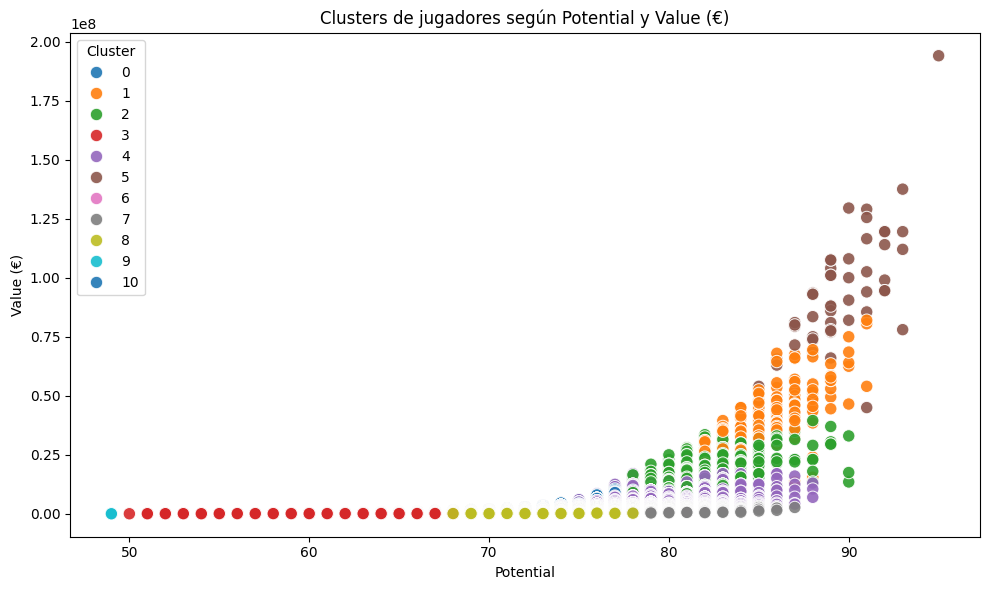

In [10]:
# Mapa de clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=players, x="potential", y="value_eur",
    hue="cluster", palette="tab10", alpha=0.9, s=80
)
plt.title("Clusters de jugadores según Potential y Value (€)")
plt.xlabel("Potential")
plt.ylabel("Value (€)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

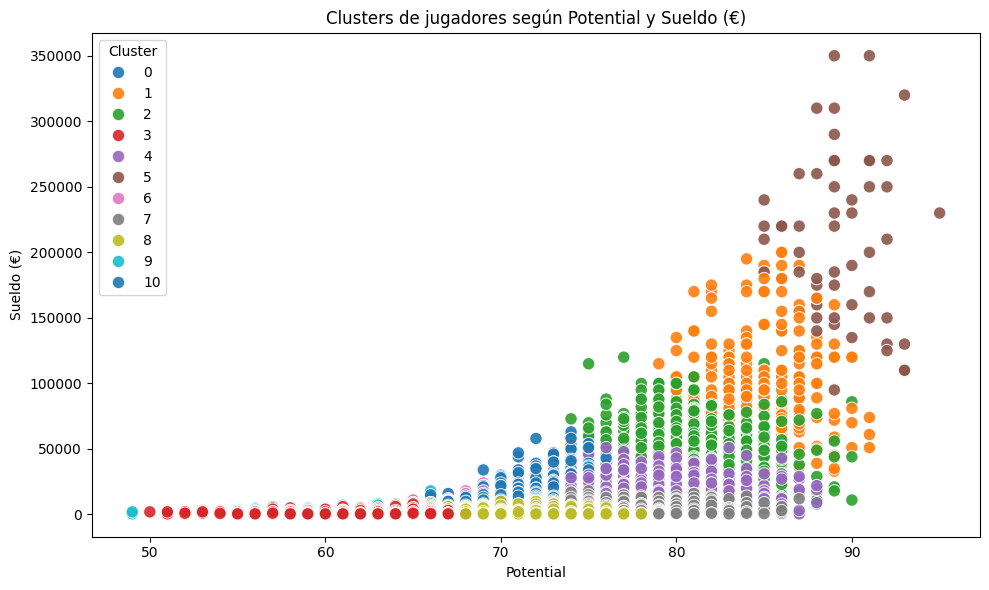

In [11]:
# Mapa de clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=players, x="potential", y="wage_eur",
    hue="cluster", palette="tab10", alpha=0.9, s=80
)
plt.title("Clusters de jugadores según Potential y Sueldo (€)")
plt.xlabel("Potential")
plt.ylabel("Sueldo (€)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

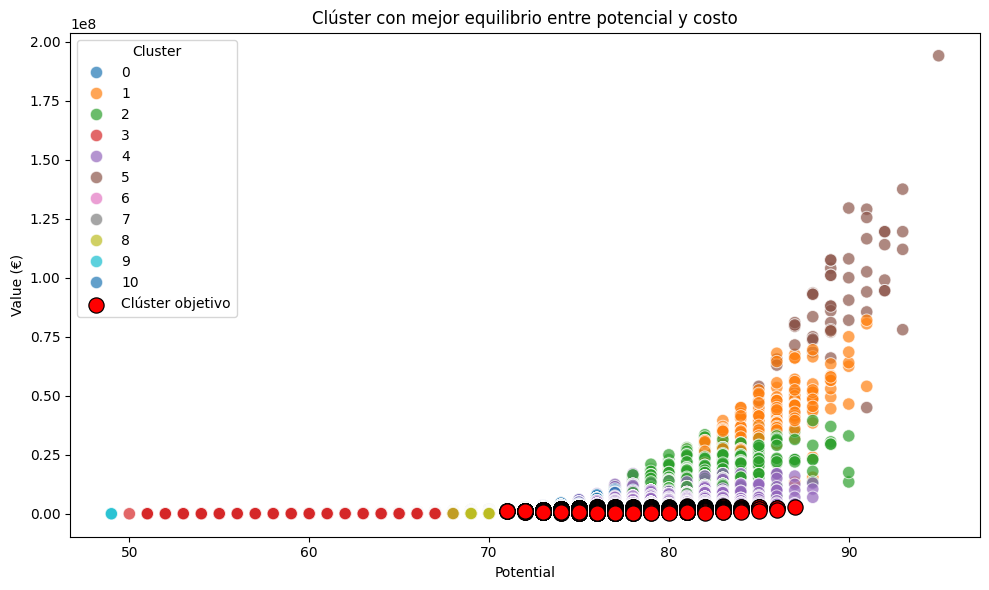

In [12]:
# Resaltar clúster objetivo
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=players, x="potential", y="value_eur",
    hue="cluster", palette="tab10", alpha=0.7, s=80
)
sns.scatterplot(
    data=jugadores_objetivo, x="potential", y="value_eur",
    color="red", s=120, label="Clúster objetivo", edgecolor="k"
)
plt.title("Clúster con mejor equilibrio entre potencial y costo")
plt.xlabel("Potential")
plt.ylabel("Value (€)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

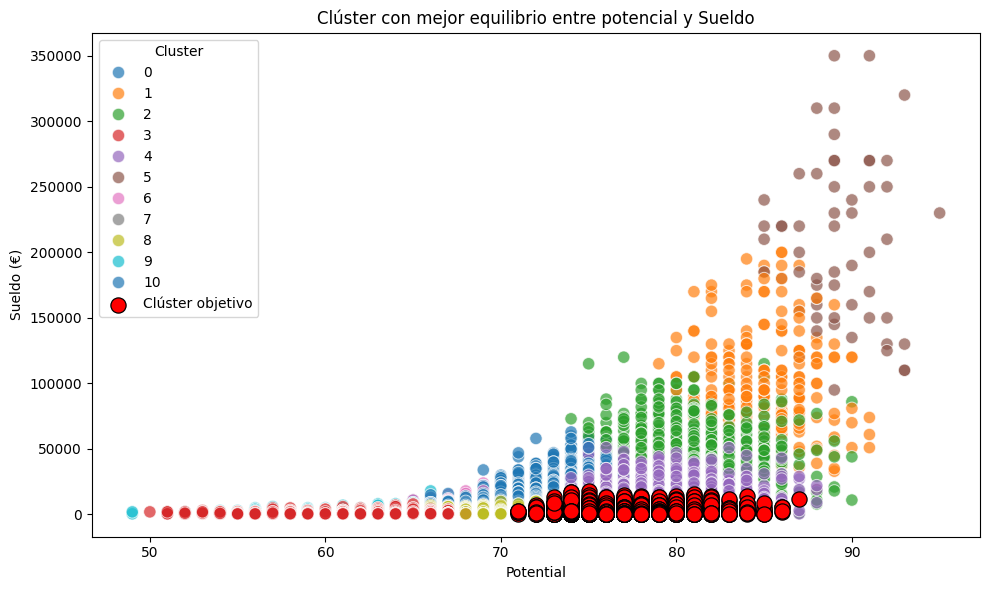

In [13]:
# Resaltar clúster objetivo
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=players, x="potential", y="wage_eur",
    hue="cluster", palette="tab10", alpha=0.7, s=80
)
sns.scatterplot(
    data=jugadores_objetivo, x="potential", y="wage_eur",
    color="red", s=120, label="Clúster objetivo", edgecolor="k"
)
plt.title("Clúster con mejor equilibrio entre potencial y Sueldo")
plt.xlabel("Potential")
plt.ylabel("Sueldo (€)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()